# DATA ANALYIS PART

In [116]:
import pandas as pd
import numpy as np

In [117]:
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",100)

In [118]:
car_data1=pd.read_csv("CarPrice_Assignment.csv")

In [234]:
car_data1.iloc[167]

car_ID                                 168
symboling                                2
CarName             toyota corona liftback
fueltype                               gas
aspiration                             std
doornumber                             two
carbody                            hardtop
drivewheel                             rwd
enginelocation                       front
wheelbase                             98.4
carlength                            176.2
carwidth                              65.6
carheight                               52
curbweight                            2540
enginetype                             ohc
cylindernumber                        four
enginesize                             146
fuelsystem                            mpfi
boreratio                             3.62
stroke                                 3.5
compressionratio                       9.3
horsepower                             116
peakrpm                               4800
citympg    

In [120]:
car_data1.shape

(205, 26)

In [121]:
car_data1.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [122]:
car_data.dtypes

symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
dtype: object

In [123]:
np.sort(car_data["enginesize"].unique())

array([ 61,  70,  79,  80,  90,  91,  92,  97,  98, 103, 108, 109, 110,
       111, 119, 120, 121, 122, 130, 131, 132, 134, 136, 140, 141, 145,
       146, 151, 152, 156, 161, 164, 171, 173, 181, 183, 194, 203, 209,
       234, 258, 304, 308, 326], dtype=int64)

In [124]:
car_data=car_data1.drop(["car_ID","CarName","price"],axis=1)
car_data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [125]:
# To seprate the object type col to vectorize 
droped_obj_col=[]
for i,d_type in enumerate(car_data.dtypes):
    if d_type=="object":
        col=car_data.columns[i]
        droped_obj_col.append(col)
droped_obj_col

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [126]:
# car data col, dropped the object type data col, only int and float data col
car_data_drop=car_data.drop(droped_obj_col,axis=1)


In [127]:
# one hot encode (to_categorical())  /  get_dummies()
concatinate_data=[]
for i in droped_obj_col:
    n_name=i,"_categorical"
    n_name=pd.get_dummies(car_data[i])
    concatinate_data.append(n_name)
one_hot_encode=pd.concat(concatinate_data,axis=1)
print(one_hot_encode.shape)

(205, 38)


In [131]:
# vormalize the car_data_drop
mean = car_data_drop.mean(axis=0)
car_data_drop -= mean
std = car_data_drop.std(axis=0)
car_data_drop /= std


In [129]:
car_data_final=pd.concat([car_data_drop,one_hot_encode],axis=1)

In [130]:
car_data_final

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,diesel,gas,std,turbo,four,two,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,front,rear,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,eight,five,four,six,three,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1.739213,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,0.074267,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.644974,-0.544725,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1.739213,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,0.074267,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.644974,-0.544725,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.133183,-0.706865,-0.230948,-0.190101,-0.542200,0.513625,0.602571,-2.399008,0.684271,-0.287645,1.261448,-0.262318,-0.950684,-0.689938,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0.936198,0.173274,0.206750,0.136209,0.235366,-0.419770,-0.430023,-0.516003,0.461055,-0.035885,-0.053537,0.785932,-0.186409,-0.109087,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.936198,0.106848,0.206750,0.229440,0.235366,0.515545,0.218350,-0.516003,0.461055,-0.539405,0.275209,0.785932,-1.103540,-1.270789,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.472847,1.717669,1.195622,1.394830,0.726460,0.761377,0.338419,1.662375,-0.336147,-0.161765,0.249921,0.576282,-0.339264,-0.399512,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
201,-1.472847,1.717669,1.195622,1.348215,0.726460,0.947672,0.338419,1.662375,-0.336147,-0.363173,1.413178,0.366632,-0.950684,-0.835151,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
202,-1.472847,1.717669,1.195622,1.394830,0.726460,0.876611,1.106861,0.923942,-1.229012,-0.337997,0.755685,0.785932,-1.103540,-1.125577,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
203,-1.472847,1.717669,1.195622,1.394830,0.726460,1.270327,0.434474,-1.180593,0.461055,3.236992,0.047616,-0.681618,0.119302,-0.544725,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [140]:
# target/ output/ price col   (in $)
target_data=car_data1["price"]
target_data.shape

(205,)

In [149]:
# seprating test and train data
train_data=car_data_final[0:155]
test_data=car_data_final[155:]
train_targets=target_data[0:155]
test_targets=target_data[155:]
print(train_data.shape)
print(train_targets.shape)
print(test_data.shape)
print(test_targets.shape)

(155, 52)
(155,)
(50, 52)
(50,)


# MODEL TRAINING


In [132]:
import tensorflow.keras
from keras import models
from keras import layers

In [221]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(car_data_final.shape[1],)))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='Adam', loss='mse', metrics=['mae'])
    return model

In [222]:
# model.fit(x=train_data,y=train_targets, epochs=50, batch_size=1)

Epoch 1/50
155/155 [==============================] - 0s 2ms/step - loss: 4019060.0000 - mae: 1331.7266
Epoch 2/50
155/155 [==============================] - 0s 2ms/step - loss: 4023142.0000 - mae: 1347.8013
Epoch 3/50
155/155 [==============================] - 0s 2ms/step - loss: 3978427.0000 - mae: 1340.3137
Epoch 4/50
155/155 [==============================] - 1s 4ms/step - loss: 3893618.0000 - mae: 1332.0117
Epoch 5/50
155/155 [==============================] - 0s 3ms/step - loss: 3900065.7500 - mae: 1339.3909
Epoch 6/50
155/155 [==============================] - 0s 3ms/step - loss: 3852749.7500 - mae: 1331.9366
Epoch 7/50
155/155 [==============================] - 1s 4ms/step - loss: 3813331.0000 - mae: 1319.9534
Epoch 8/50
155/155 [==============================] - 1s 4ms/step - loss: 3801154.5000 - mae: 1326.2802
Epoch 9/50
155/155 [==============================] - 0s 3ms/step - loss: 3781925.5000 - mae: 1330.2832
Epoch 10/50
155/155 [==============================] - 0s 2ms/st

In [224]:
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                         train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                            train_targets[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [225]:
all_mae_histories

[[13334.21875,
  13283.0439453125,
  13167.6806640625,
  12962.6064453125,
  12623.8203125,
  12152.9970703125,
  11498.7490234375,
  10691.77734375,
  9681.8037109375,
  8507.3779296875,
  7225.49853515625,
  5894.23681640625,
  5025.55322265625,
  4555.830078125,
  4299.44580078125,
  4069.650146484375,
  3899.160888671875,
  3790.7392578125,
  3713.6767578125,
  3655.644287109375,
  3599.76318359375,
  3516.418212890625,
  3511.703857421875,
  3478.70361328125,
  3426.730224609375,
  3393.17236328125,
  3368.80615234375,
  3339.7470703125,
  3293.423828125,
  3260.476806640625,
  3227.81787109375,
  3178.75146484375,
  3145.42529296875,
  3111.5048828125,
  3080.7119140625,
  3045.96435546875,
  3005.589111328125,
  2976.6298828125,
  2947.720703125,
  2913.6591796875,
  2884.995361328125,
  2858.60595703125,
  2827.426513671875,
  2795.01025390625,
  2758.623046875,
  2736.064208984375,
  2708.813720703125,
  2685.4287109375,
  2674.223388671875,
  2664.660400390625,
  2653.1257324

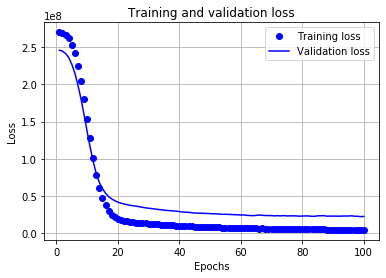

In [226]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [227]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

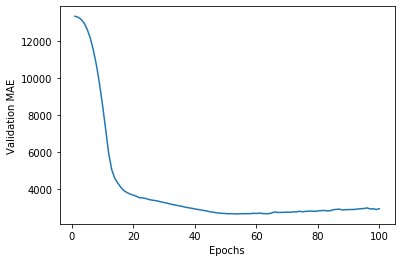

In [228]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [229]:
list1=[]
predicted1=model.predict(test_data)
for i in predicted1:
    list1.append(i)
predicted=pd.DataFrame(list1,index=np.arange(155,205))

In [230]:
compare_prices=pd.concat([test_targets,predicted],1)

In [231]:
compare_prices

,price,0
155,8778.0,8206.401367
156,6938.0,7294.884277
157,7198.0,5975.813965
158,7898.0,7933.979980
159,7788.0,6566.185059
160,7738.0,7318.687988
161,8358.0,5990.125488
162,9258.0,7362.186035
163,8058.0,10594.284180
164,8238.0,9194.448242
